# Import necessary libraries and modules

In [1]:
from skimage import io, color
from pre_process import PreProcess
import os
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

### Create an instance of the PreProcess class

In [2]:
process = PreProcess()

### Specify the path to the test data

In [3]:
ts_path = "D:\\New folder\\Data\\tst" 

In [4]:
test_df = process.test_file_labelling(ts_path) # Label the test images

In [5]:
test_df.head()

,Location
0,D:\New folder\Data\tst\cat.10.jpg
1,D:\New folder\Data\tst\cat.102.jpg
2,D:\New folder\Data\tst\cat.108.jpg
3,D:\New folder\Data\tst\cat.118.jpg
4,D:\New folder\Data\tst\cat.128.jpg


### Initialize empty lists and dataframes to store HOG features

In [6]:
test_ls = []
count = 0
df = pd.DataFrame()

# Extract HOG features for a subset of test images
for i in test_df['Location'].loc[:53]:
    extracted_feature_dog, image_path = process.extract_hog_feature(i)
    test_ls.append([extracted_feature_dog, image_path])    
    count += 1
print(count)

53


### Create a dataframe to store HOG features

In [7]:
for i in range(len(test_ls)):
    df = pd.concat([df, pd.Series(test_ls[i][0])],axis=1)

In [8]:
# Transpose the dataframe to have features in rows and samples in columns
df= df.transpose()

In [9]:
# Reset the index to start from 0
df = df.reset_index()

In [10]:
# Dropping a Column
df.drop('index', axis = 1, inplace=True)

## Load the trained SVM model

In [11]:
model = joblib.load("best_svm_model.joblib")

### Convert the HOG features to a NumPy array

In [12]:
X_test = np.array(df)

In [13]:
y_pred = model.predict(X_test)  # Predict the target labels using the SVM model

In [14]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

### Create a new dataframe with predicted target labels

In [39]:
upd_test_df = test_df.loc[:53] 
upd_test_df['target'] = y_pred

C:\Users\jiten\AppData\Local\Temp\ipykernel_20756\2425862914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upd_test_df['target'] = y_pred


In [17]:
upd_test_df.head()  

,Location,target
0,D:\New folder\Data\tst\cat.10.jpg,1
1,D:\New folder\Data\tst\cat.102.jpg,1
2,D:\New folder\Data\tst\cat.108.jpg,1
3,D:\New folder\Data\tst\cat.118.jpg,0
4,D:\New folder\Data\tst\cat.128.jpg,1


In [18]:
upd_test_df.target.unique() # Display the unique target labels in the updated test dataframe

array([1, 0], dtype=int64)

### Create a dataframe for the "cat" category

In [ ]:
cat = upd_test_df[upd_test_df['target'] == 0]

### Create a dataframe for the "dog" category

In [27]:
dog = upd_test_df[upd_test_df['target'] == 1]

In [21]:
cat = cat[:5].reset_index()
dog = dog[:10].reset_index()

In [22]:
cat.drop('index', axis=1, inplace=True)
dog.drop('index', axis=1, inplace=True)

In [28]:
len(cat)

12

In [29]:
len(dog)

41

## Display the "cat" images

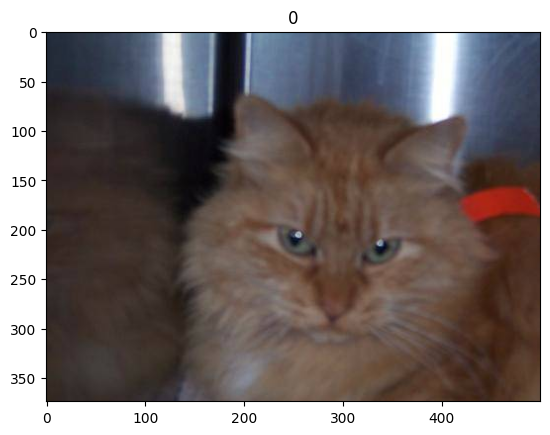

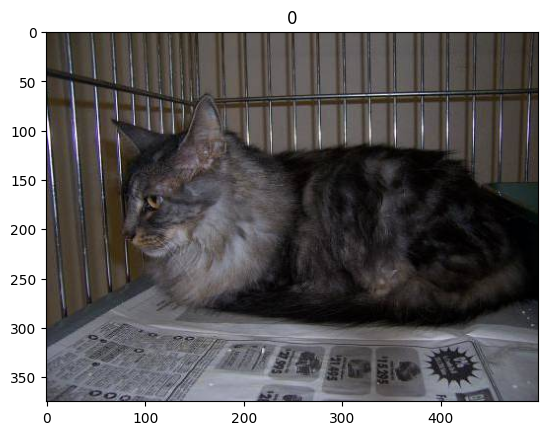

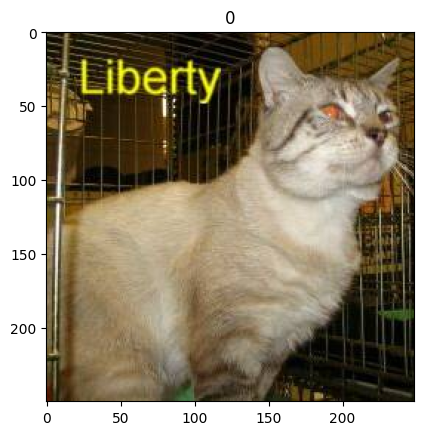

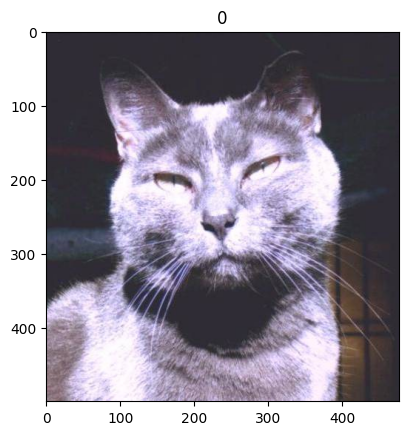

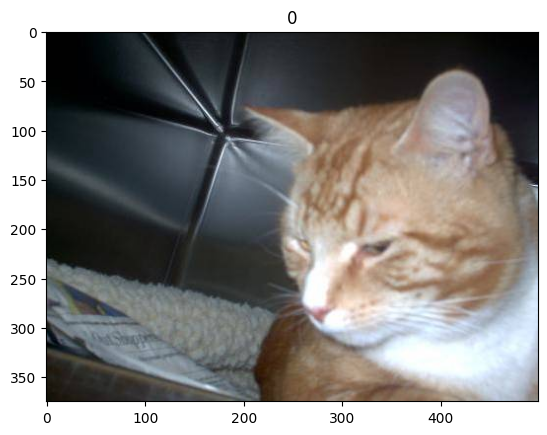

In [24]:
for i in range(len(cat)):
    img = io.imread(cat['Location'][i])
    plt.imshow(img)
    plt.title(cat.target[i])
    plt.show()

## Display the "dog" images

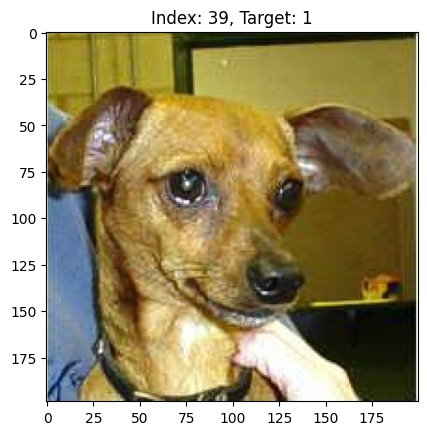

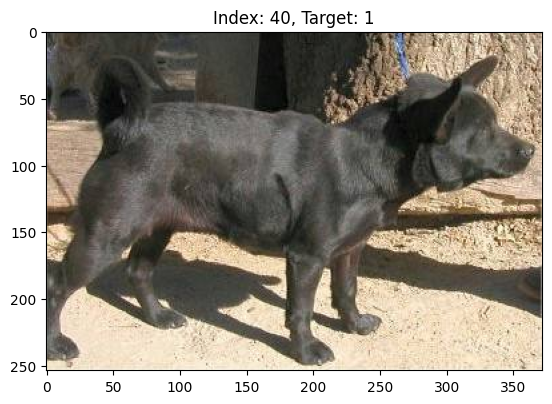

In [36]:
dog = upd_test_df[upd_test_df['target'] == 1]

# Reset the index to start from 0
dog.reset_index(drop=True, inplace=True)

# Display only the images with index 39 and 40 in the "dog" category
for index, row in dog.iterrows():
    if index == 39 or index == 40:
        img = io.imread(row['Location'])
        plt.imshow(img)
        plt.title(f"Index: {index}, Target: {row['target']}")
        plt.show()